 # Graph Handling
 For this exercise we will learn to use `pytorch_geometric` (PyG) to run GNNs.
 The library comes with a comprehensive [documentation](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html) and not only provides tools to handle graphs but also provides a large set of GNN specific layers and dataset.

In [1]:
# Add this in a Google Colab cell to install the correct version of Pytorch Geometric.
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric matplotlib networkx rich

/home/mscham/deep-learning-physics/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
You should consider upgrading via the '/home/mscham/deep-learning-physics/venv/bin/python -m pip install --upgrade pip' command.
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
You should consider upgrading via the '/home/mscham/deep-learning-physics/venv/bin/python -m pip install --upgrade pip' command.
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
You should consider upgrading via the '/home/mscham/deep-learning-physics/venv/bin/python -m pip install --upgrade pip' command.
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
You should consider upgrading via the '/home/mscham/deep-learning-physics/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/mscham/deep-learning-physics/venv/bin/python -m pip install --upgrade pip' command.


 ## Task 1.1
 [Data Handling of Graphs](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#data-handling-of-graphs) offers a nice introduction into handling graphs.
 Provide an adjacency matric for cyclic graph (each nodes connects to the next) with 5 nodes. Convert the adjacency matric to an edge_index. With this edge_index implement a graph with features [0,1,...,n-1]:

In [2]:
import torch
from torch_geometric.data import Data, Batch
from torch_geometric.utils import dense_to_sparse

adj = torch.tensor(
    [
        [
            [0.0, 1.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 1.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 1.0],
            [1.0, 0.0, 0.0, 0.0, 0.0],
        ]
    ]
)

cycle = Data(
    x=torch.tensor(range(5)),
    edge_index=dense_to_sparse(adj)[0],
)

 ## Task 1.2
 Implement binary tree with 7 nodes over three levels directly constructing the edge_index.:
    0
  1   2
 3 4 5 6

In [3]:
tree = Data(
    x=torch.tensor(range(7)),
    edge_index=torch.tensor([[0, 1], [0, 2], [1, 3], [1, 4], [2, 5], [2, 6]]).T,
)

 ## Task 1.3
 Convert the implemented PyG graphs to `networkx` graphs and plot them.

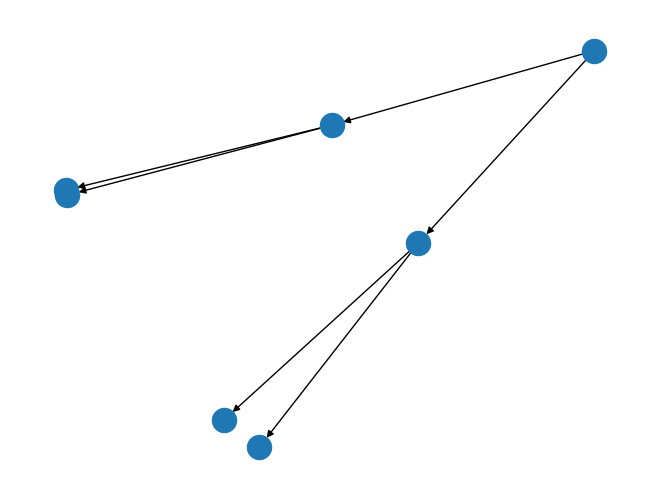

In [4]:
from torch_geometric.utils import to_networkx
import networkx as nx

nx.draw_kamada_kawai(to_networkx(tree))

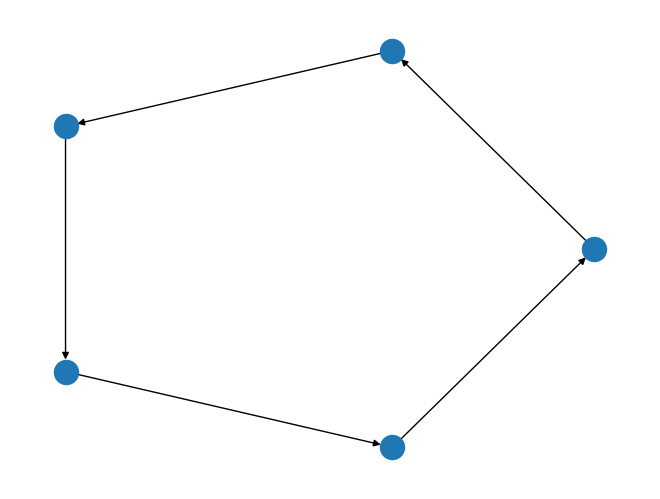

In [5]:
nx.draw_kamada_kawai(to_networkx(cycle))

 ## Task 1.4
 Have a look at the documentation on [Mini-batches](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#mini-batches)
 Batch the two graphs together. And plot the batch with networkx. What do you see ?

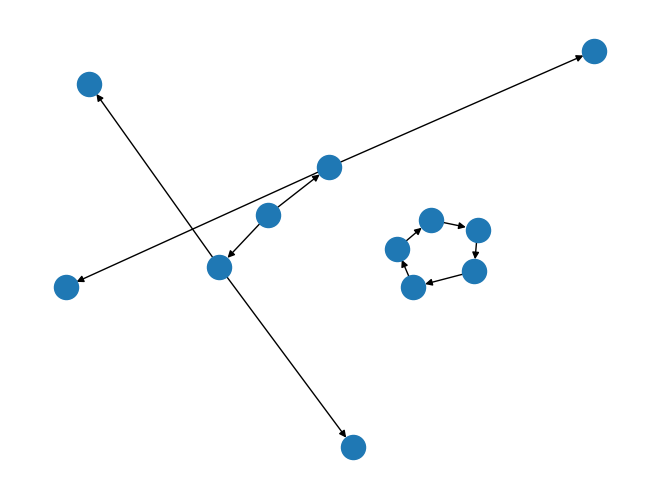

In [6]:
batch = Batch.from_data_list([tree, cycle])
nx.draw(to_networkx(batch))
# -> The Graphs are combined to a larger graph.

 ## Task 1.5
 Inspect the properties of the batch.
 You can use the `inspect` method of the rich library or a simple `print`.
 What do the `batch` and `ptr` attributes do?

In [7]:
import rich
rich.inspect(batch)
# -> `batch` provides the index for teh feature  matrix of each graph in the feature vector of the batch
# -> `ptr` does the same, but with a range

/home/mscham/deep-learning-physics/venv/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'num_faces' is deprecated, use 'data.face.size(-1)' instead
  warnings.warn(out)


╭────────────────────────── DataBatch(x=[12], edge_index=[2, 11], batch=[12], ptr=[3]) ───────────────────────────╮
│ def (*args: List[str]) -> Iterable:                                                                             │
│                                                                                                                 │
│             batch = tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])                                                │
│         edge_attr = None                                                                                        │
│        edge_index = tensor([[ 0,  0,  1,  1,  2,  2,  7,  8,  9, 10, 11],                                       │
│                             [ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11,  7]])                                      │
│       edge_stores = [                                                                                           │
│                         {'x': tensor([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4]), 'edge_index': tensor([[ 0,  0,  1,  │
│                     1,  2,  2,  7,  8,  9, 10, 11],                                                             │
│                             [ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11,  7]]), 'batch': tensor([0, 0, 0, 0, 0, 0,  │
│                     0, 1, 1, 1, 1, 1]), 'ptr': tensor([ 0,  7, 12])}                                            │
│                     ]                                                                                           │
│       edge_weight = None                                                                                        │
│           is_cuda = False                                                                                       │
│              keys = ['edge_index', 'x', 'ptr', 'batch']                                                         │
│       node_stores = [                                                                                           │
│                         {'x': tensor([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4]), 'edge_index': tensor([[ 0,  0,  1,  │
│                     1,  2,  2,  7,  8,  9, 10, 11],                                                             │
│                             [ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11,  7]]), 'batch': tensor([0, 0, 0, 0, 0, 0,  │
│                     0, 1, 1, 1, 1, 1]), 'ptr': tensor([ 0,  7, 12])}                                            │
│                     ]                                                                                           │
│ num_edge_features = 0                                                                                           │
│         num_edges = 11                                                                                          │
│         num_faces = None                                                                                        │
│      num_features = 1                                                                                           │
│        num_graphs = 2                                                                                           │
│ num_node_features = 1                                                                                           │
│         num_nodes = 12                                                                                          │
│               pos = None                                                                                        │
│            stores = [                                                                                           │
│                         {'x': tensor([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4]), 'edge_index': tensor([[ 0,  0,  1,  │
│                     1,  2,  2,  7,  8,  9, 10, 11],                                                             │
│                             [ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11,  7]]), 'batch': tensor([0, 0, 0, 0, 0, 0,  │
│                     0, 1, 1, 1, 1, 1]), 'ptr': tensor(